# Global Power Plant Database

### Import Libraries

In [1]:
# Import libraries
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('../Datasets/Database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Dataset is having numeric and categorical type columns. Also it contains NaN values.

### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The dataset covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  
1) Primary Fuel (text): energy source used in primary electricity generation or export   
2) capacity_mw (number): electrical generating capacity in megawatts

Hence, 1) is classification problem and 2) is a regression problem.

In [3]:
# Checking columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
# Checking datatypes
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Here, columns are of object and fload type.

In [5]:
#Checking the dataset shape
df.shape

(908, 25)

Dataset is having 908 rows and 25 columns (905 input features and 25 output feature).

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there are many null values in the dataset. Datatype seems to be appropriate so there is no need of data conversion.

### Data Preprocessing

In [7]:
# Checking which all columns are relevant for model training
for i in df.columns :
    print(i)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

country
Unique values :  1
Value counts  :  IND    908
Name: country, dtype: int64
----------------------
country_long
Unique values :  1
Value counts  :  India    908
Name: country_long, dtype: int64
----------------------
name
Unique values :  908
Value counts  :  CHIBRO (YAMUNA)         1
SANGLI MIRAJ BIOMASS    1
GADEPAN WORKS           1
ARVINDNAGAR SUGAR       1
VARAHI                  1
                       ..
KAKKAD                  1
SHRI MALAPRABHA         1
PERIYAR                 1
MAHI BAJAJ I&II         1
TADALI SPONGE IRON      1
Name: name, Length: 908, dtype: int64
----------------------
gppd_idnr
Unique values :  908
Value counts  :  IND0000122    1
IND0000442    1
WRI1019987    1
WRI1026673    1
WRI1020015    1
             ..
WRI1026069    1
IND0000177    1
IND0000298    1
WRI1026091    1
IND0000371    1
Name: gppd_idnr, Length: 908, dtype: int64
----------------------
capacity_mw
Unique values :  365
Value counts  :  5.0       39
10.0      22
600.0     21
15.0   

Column country has only 1 value i.e. IND for all the 908 records.

country_long has only 1 value i.e. India for all the 908 records.

name has 908 unique values that means either we can drop it or use it as index.

gppd_idnr has 908 unique values i.e. different value for each column.

other_fuel2 has only 1 value and rest all rows are null for this column.

other_fuel3 column do not have any value. 

wepp_id column do not have any value.

year_of_capacity_data has only 1 value i.e. 2018.0 and Null values in the column.

generation_data_source has only 1 unique value in 450 rows and rest all rows are null.

estimated_generation_gwh has 0 unique values i.e. do not have any value and all row values are null.

Since these columns could not give any significant contribution to the model performance, we can drop these columns for better analysis.

In [8]:
df.drop(['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','wepp_id','year_of_capacity_data','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


Dropped the irrelevant columns and now we will look at the NaN values present in the dataset.

In [9]:
#Checking nulls in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  566
source                   0
url                      0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

Columns other_fuel1,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,commissioning_year are having null values more than 40%, hence removing the columns.

In [10]:
df.drop(['other_fuel1','owner','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','commissioning_year'],axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,25.5,15.2758,75.5811,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


Now we have dataset with 908 rows and 7 columns.

### EDA and Visualisations

In [11]:
# Checking for nulls
df.isnull().sum()

capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

Columns latitude,longitude,commissioning_year,geolocation_source are still having null values. Let's treat these.

<AxesSubplot:>

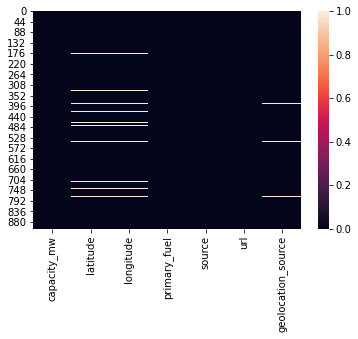

In [12]:
# Visualising null values
sns.heatmap(df.isnull())

Multiple null values in above mentioned columns can be seen here in heatmap.

In [13]:
df[df['latitude'].isnull() & df['latitude'].isna()]

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
14,9.00,NaN,NaN,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
25,50.00,NaN,NaN,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN
43,450.00,NaN,NaN,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
46,600.00,NaN,NaN,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
68,5.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1218...,NaN
73,25.20,NaN,NaN,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI
179,5.00,NaN,NaN,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
193,125.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...,NaN
202,15.00,NaN,NaN,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
209,75.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/filestorage/O/6/L/O6LOW...,NaN


For all NaNs in latitude, longitude is also NaN.

In [14]:
df[df['geolocation_source'].isnull()]

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
25,50.00,NaN,NaN,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN
68,5.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1218...,NaN
193,125.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...,NaN
209,75.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/filestorage/O/6/L/O6LOW...,NaN
251,28.00,NaN,NaN,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN
387,100.00,NaN,NaN,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN
441,4.00,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...,NaN
503,50.00,NaN,NaN,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN
546,27.65,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1173...,NaN
656,22.50,NaN,NaN,Wind,CDM,https://cdm.unfccc.int/Projects/DB/BVQI1201770...,NaN


For all geolocation_source that are null, latitude & longitude are also null.

In [18]:
# Checking rows with nulls in all 4 columns
df[df['latitude'].isnull() & df['longitude'].isnull() & df['geolocation_source'].isnull()]

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source


This data is having approx 43% null values rowise, hence we can drop these rows.

In [19]:
# Dropping rows
df.dropna(subset=['latitude','longitude','geolocation_source'],thresh=1,axis=0,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,25.5,15.2758,75.5811,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


In [20]:
df.isnull().sum()

capacity_mw            0
latitude              27
longitude             27
primary_fuel           0
source                 0
url                    0
geolocation_source     0
dtype: int64

Now we will NaN with some statistic value according to the datatypes.

latitude -0.1436221673907982


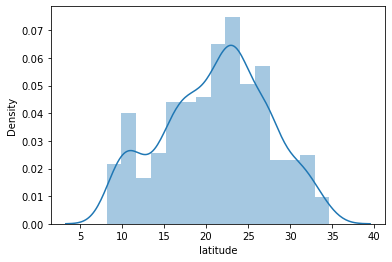

longitude 1.1009421966310267


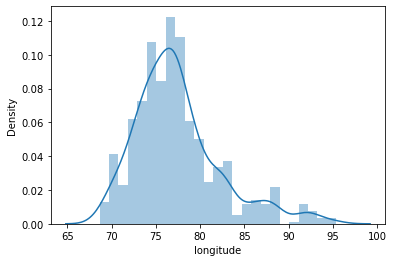

In [21]:
col=['latitude','longitude']
for i in col :
    if df[i].dtypes!='object':
        print(i, df[i].skew())
        sns.distplot(df[i])
        plt.show()

Columns latitude,longitude,commissioning_year are of float type and not having normal distribution, hence NaN values will be filled by median. Column geolocation_source is object type whose NaN values will be filled by mode.

In [22]:
# Treating null values
df['latitude'].fillna(df['latitude'].median(),inplace=True)
df['longitude'].fillna(df['longitude'].median(),inplace=True)
#df['commissioning_year'].fillna(df['commissioning_year'].median(),inplace=True)
#df['geolocation_source'].fillna('WRI',inplace=True)

In [23]:
# Checking the null values after treatment
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

<AxesSubplot:>

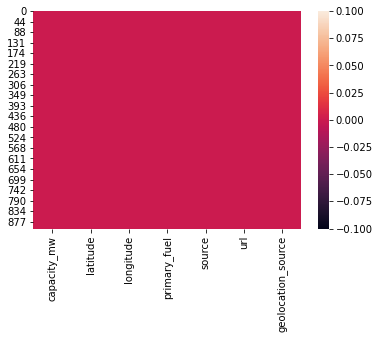

In [24]:
# Visualizing nulls
sns.heatmap(df.isnull())

We have treated all the null values in dataset.

In [25]:
# Checking for the duplicates in the dataset
df[df.duplicated()==True].count()

capacity_mw           6
latitude              6
longitude             6
primary_fuel          6
source                6
url                   6
geolocation_source    6
dtype: int64

There are 6 duplicate row in the dataset.

In [26]:
# Checking duplicate row
duplicate = df[df.duplicated()]
print("Duplicate Row :")
duplicate

Duplicate Row :


,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
372,77.65,31.2680,76.49200,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
480,9.00,21.7783,76.71925,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
539,5.00,21.7783,76.71925,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
733,6.60,21.7783,76.71925,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
742,4.00,21.7783,76.71925,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
782,36.00,15.2615,76.33790,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI


In [27]:
# Duplicates
df[(df['capacity_mw']==77.65) & (df['primary_fuel']=='Hydro') & (df['geolocation_source']=='WRI')]

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
222,77.65,31.268,76.492,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI
372,77.65,31.268,76.492,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI


Let's delete this duplicate row for proceeding with the analysis.

In [29]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,25.5,15.2758,75.5811,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


Out dataset is now having no nulls and no duplicates. Dataset is of 892*8 dimension.

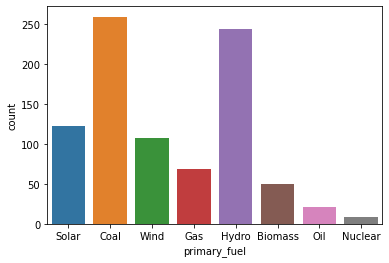

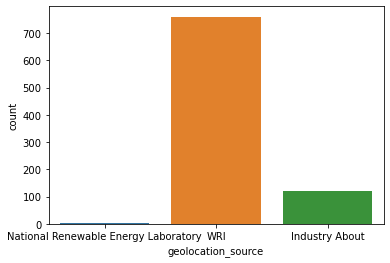

In [30]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if (df[i].nunique()<25) :
        sns.countplot(df[i])
        plt.show()

Primary_fuel coal followed by Hydro is highly comsumed. Geolocation_source WRI is in majority.

In [31]:
df.groupby('primary_fuel')['source'].value_counts()

primary_fuel  source                                                     
Biomass       Shree Sugars ltd                                                 3
              Shri Ssk ltd                                                     3
              Nsl Sugars ltd                                                   2
              Ashok Ssk ltd                                                    1
              Bannari Sugars ltd                                               1
                                                                            ... 
Solar         Urja Private edEr                                                1
              Videocon Industries Limited                                      1
              Welspun Solar AP Private Limited                                 1
              West Bengal Energy Development Corporation Limited (WBEDCL)      1
Wind          CDM                                                            108
Name: source, Length: 199, dtype: i

Different primary_fuel have different sources just Wnd has CDM as source.

In [32]:
df.groupby('primary_fuel')['capacity_mw'].mean()

primary_fuel
Biomass     20.065200
Coal       777.695830
Gas        364.114072
Hydro      189.316885
Nuclear    975.555556
Oil         94.230476
Solar       20.565041
Wind        33.769907
Name: capacity_mw, dtype: float64

'primary_fuel' Nuclear has the highest capacity_mw mean, followed by Coal and Biomass has least capacity_mw mean.

In [33]:
print(df.groupby('geolocation_source')['capacity_mw'].sum())
print(df.groupby('geolocation_source')['capacity_mw'].mean())

geolocation_source
Industry About                            2252.000
National Renewable Energy Laboratory       277.500
WRI                                     288149.661
Name: capacity_mw, dtype: float64
geolocation_source
Industry About                           18.924370
National Renewable Energy Laboratory     69.375000
WRI                                     379.144291
Name: capacity_mw, dtype: float64


geolocation_source 'WRI' has the highest sum and mean capacity_mw.

In [34]:
df.groupby('primary_fuel')['latitude'].mean()

primary_fuel
Biomass    17.460458
Coal       21.707110
Gas        20.075190
Hydro      22.202273
Nuclear    18.081478
Oil        17.749238
Solar      24.095380
Wind       17.857224
Name: latitude, dtype: float64

primary_fuel Solar has the highest mean of latitude.

In [35]:
# Pivot table showing counts
pd.crosstab(df['geolocation_source'],df['primary_fuel'])

primary_fuel,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
geolocation_source,,,,,,,,
Industry About,0,0,0,0,0,0,119,0
National Renewable Energy Laboratory,0,0,0,0,0,0,4,0
WRI,50,259,69,244,9,21,0,108


primary_fuel:Biomass,Coal,Gas,Hydro,Nuclear,Oil,Wind are mostly in WRI(geolocation_source). primary_fuel:Solar is mostly in geolocation_source:Industry About. A few primary_fuel:Solar are in geolocation_source:National Renewable Energy Laboratory.

{'bodies': [<matplotlib.collections.PolyCollection at 0x239b0a460d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x239b09756d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x239b0a46580>,
 'cbars': <matplotlib.collections.LineCollection at 0x239b0a46880>}

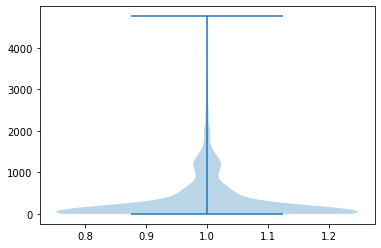

In [36]:
#violinplot
plt.violinplot(df['capacity_mw'])

Majority of capacity_mw value lies below 500.

Consumption of fuel has highly taken place in and around commissioning_year 2020 and above.

{'bodies': [<matplotlib.collections.PolyCollection at 0x239b0aa0670>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x239b0a86d90>,
 'cmins': <matplotlib.collections.LineCollection at 0x239b0aa0b20>,
 'cbars': <matplotlib.collections.LineCollection at 0x239b0aa0e20>}

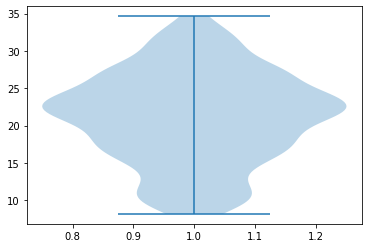

In [37]:
#violinplot
plt.violinplot(df['latitude'])

latitude distribution is highly in the range of 15-30.

{'bodies': [<matplotlib.collections.PolyCollection at 0x239b0b041c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x239b0ab9d60>,
 'cmins': <matplotlib.collections.LineCollection at 0x239b0b04670>,
 'cbars': <matplotlib.collections.LineCollection at 0x239b0b04970>}

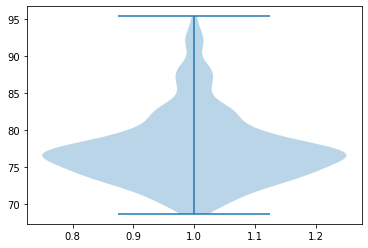

In [38]:
#violinplot
plt.violinplot(df['longitude'])

latitude distribution is highly in the range of 73-80.

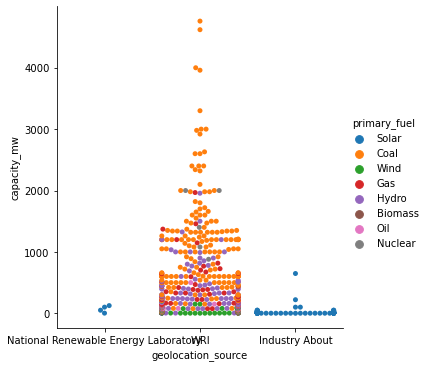

In [39]:
# Swarmplot
sns.catplot('geolocation_source','capacity_mw',data=df,kind='swarm',hue='primary_fuel')

Only primary_fuel:Solar is there in geolocation_source:Industry About & National Renewable Energy Laboratory with capacity_mw below 500. In geolocation_source:WRI, all primary_fuels are there but Coal is in abundance with capacity_mw above 4000.

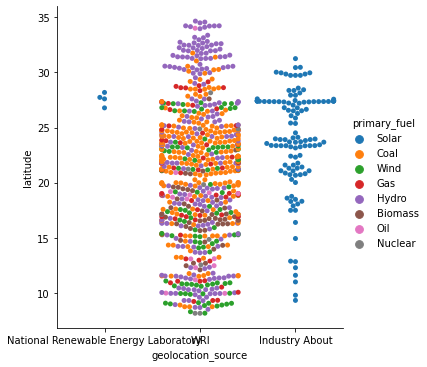

In [40]:
# Swarmplot
sns.catplot('geolocation_source','latitude',data=df,kind='swarm',hue='primary_fuel')

geolocation_source:Industry About has comsumption details of only Solar primary_fuel that is in latitude range of 9-31. geolocation_source:National Renewable Energy Laboratory has comsumption details of only Solar primary_fuel that is in the latitude range of 71-73.
geolocation_source:WRI has comsumption details of all the primary_fuels distributed in latitude range of 8-34.

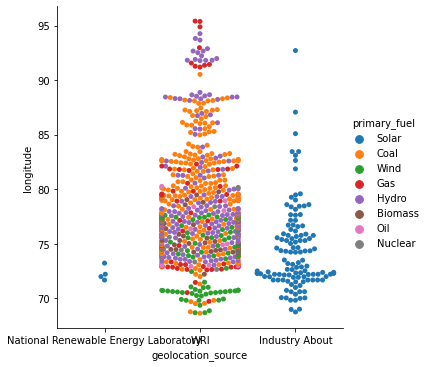

In [41]:
# Swarmplot
sns.catplot('geolocation_source','longitude',data=df,kind='swarm',hue='primary_fuel')

geolocation_source:Industry About has comsumption details of only Solar primary_fuel that is in latitude range of 69-93. geolocation_source:National Renewable Energy Laboratory has comsumption details of only Solar primary_fuel that is in the latitude range of 71-73.
geolocation_source:WRI has comsumption details of all the primary_fuels distributed in latitude range of 68-96.

## Let's take the Regression Problem first with target variable capacity_mw

### Dividing dataset in continuous and categorical

In [42]:
# Dividing the data in categorical and numeric columns
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat

,primary_fuel,source,url,geolocation_source
0,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...
903,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


In [43]:
# Continuous data
df_con=df.select_dtypes(exclude='object')
df_con.drop('capacity_mw',axis=1,inplace=True)
df_col=df['capacity_mw']

In [44]:
# Checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df_con))
np.where(z>3)

(array([178, 182, 241, 319, 329, 336, 356, 410, 421, 491, 510, 535, 627,
        797], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [45]:
# Checking the outlier in the dataset
z[178][1]

3.206694230576235

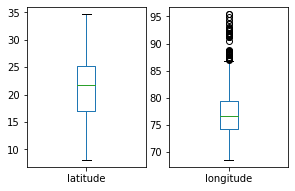

In [46]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [47]:
# Checking skewness
df_con.skew()

latitude    -0.155233
longitude    1.123685
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

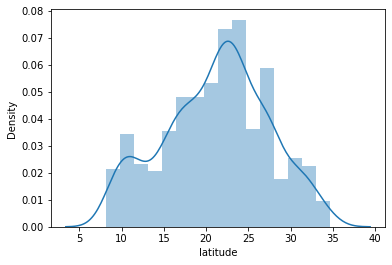

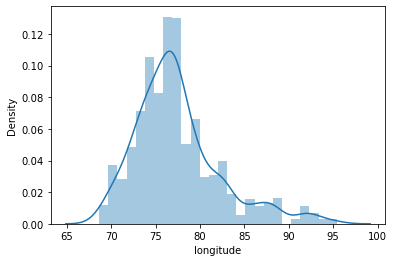

In [48]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

Data is skewed in all the columns.

### Data Cleaning

In [49]:
# Removing outliers
df1=df_con.copy()
df1=df_con[(z<3).all(axis=1)]
df1

,latitude,longitude
0,28.1839,73.2407
1,24.7663,74.6090
2,21.9038,69.3732
3,23.8712,91.3602
4,21.9603,82.4091
...,...,...
903,16.2949,77.3568
904,12.8932,78.1654
905,15.2758,75.5811
906,24.3500,73.7477


In [50]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (883, 2)
Shape of dataset after removing outliers :  (869, 2)


In [51]:
# Percentage Data lost
data_percent=(883-869)/883*100
data_percent

1.5855039637599093

Approx 2% data is lost after removing the outliers.

In [52]:
# Checking skewness after removing outliers
df1.skew()

latitude    -0.131024
longitude    0.896869
dtype: float64

We can still see skewness in longitude & commissioning_year columns.

In [53]:
# Removing skewness
df2=df1.copy()
for i in df2.columns :
    if df2[i].skew()>0.5 :
        df2[i]=np.log(df1[i]+1)
print(df2.skew())

latitude    -0.131024
longitude    0.721963
dtype: float64


In [54]:
#from scipy.stats import yeojohnson,boxcox
df2['longitude']=1/(df2['longitude'])
df2.skew()

latitude    -0.131024
longitude   -0.643143
dtype: float64

Removed skewness and for column commissioning_year skewness is increasing on further applying any transformations. Hence we consider the present values as skewness threshold based on the kind of data distribution in respective columns.

In [55]:
# Checking the new dataset
df2

,latitude,longitude
0,28.1839,0.232163
1,24.7663,0.231183
2,21.9038,0.235083
3,23.8712,0.220960
4,21.9603,0.226052
...,...,...
903,16.2949,0.229291
904,12.8932,0.228752
905,15.2758,0.230502
906,24.3500,0.231797


In [56]:
# Plotting Q-Q plot for showing gaussian distribution
def diagnostic_plot(df,col) :
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.show()

latitude


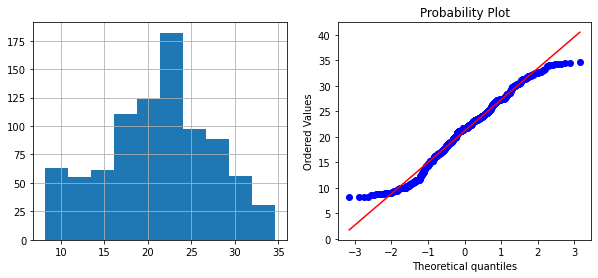

longitude


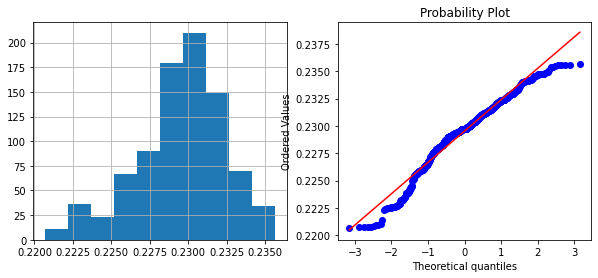

In [57]:
for i in df2.columns :
    print(i)
    diagnostic_plot(df2,i)

Data is now seem to be good fit on line implies skewness is reduced.

### Apply encoding on categorical columns

In [58]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

primary_fuel
['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
source
['National Renewable Energy Laboratory' 'Ultratech Cement ltd' 'CDM'
 'Central Electricity Authority' 'Hindustan Pvt lt' 'Dr Ssk ltd'
 'Ashok Ssk ltd' 'Shree Sugars ltd' 'Navbharat' 'Meil.In/P' 'Lancosola'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 'Sangam Spinners ltd'
 'Bharat Refinery ltd' 'Binani Industries ltd' 'Indo Synthetics ltd'
 'Ambed K Sugar' 'AES Winfra' 'Sembcorp' 'Punj Lloyd' 'Hiraco India'
 'Moserbaer Solar' 'Lingandwi' 'LEPL' 'CleanEnerg teLeanenergy'
 'Adani Power Limite r Er' 'Madhav Group' 'Power Private edM/Pdf'
 'Acc Acc ltd' 'Birla Corp ltd' 'Hindustan Zinc ltd' 'Gupta Ltd gepl)'
 'Manikghar Cement co' 'Core Fuels ltd'
 'Maharashtra State Power Generation Co Ltd (MAHAGENCO)' 'Solar for India'
 'P

In [59]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat_enc.columns :
    df_cat_enc[i]=le.fit_transform(df_cat[i])
df_cat_enc

,primary_fuel,source,url,geolocation_source
0,6,109,126,1
1,1,174,169,2
2,7,21,196,2
3,2,22,58,2
4,1,22,58,2
...,...,...,...,...
903,1,22,58,2
904,6,77,22,0
905,7,21,246,2
906,1,59,82,2


Categorical columns with object datatypes are now encoded having 883 rows and 4 columns.

### Combining numerical and categorical data for further analysis

In [60]:
dff=pd.concat([df_col,df2,df_cat_enc],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

Combined all the columns and removed nulls.

In [61]:
# Checking shape of new dataset
dff.shape

(869, 7)

In [62]:
dff.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel            int32
source                  int32
url                     int32
geolocation_source      int32
dtype: object

All the datatypes are numeric.

In [63]:
# Checking final dataset
dff

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,2.5,28.1839,0.232163,6,109,126,1
1,98.0,24.7663,0.231183,1,174,169,2
2,39.2,21.9038,0.235083,7,21,196,2
3,135.0,23.8712,0.220960,2,22,58,2
4,1800.0,21.9603,0.226052,1,22,58,2
...,...,...,...,...,...,...,...
903,1600.0,16.2949,0.229291,1,22,58,2
904,3.0,12.8932,0.228752,6,77,22,0
905,25.5,15.2758,0.230502,7,21,246,2
906,80.0,24.3500,0.231797,1,59,82,2


All the columns are of numeric type in new dataset.

In [64]:
# Checking correlation
dff.corr()

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
capacity_mw,1.000000,0.052392,-0.241097,-0.373947,-0.250079,-0.240316,0.213118
latitude,0.052392,1.000000,0.018075,-0.009567,0.064592,-0.130596,-0.195348
longitude,-0.241097,0.018075,1.000000,0.400352,0.245867,0.328595,-0.276933
primary_fuel,-0.373947,-0.009567,0.400352,1.000000,0.058533,0.565142,-0.509241
source,-0.250079,0.064592,0.245867,0.058533,1.000000,0.182111,-0.505559
url,-0.240316,-0.130596,0.328595,0.565142,0.182111,1.000000,-0.030873
geolocation_source,0.213118,-0.195348,-0.276933,-0.509241,-0.505559,-0.030873,1.000000


<AxesSubplot:>

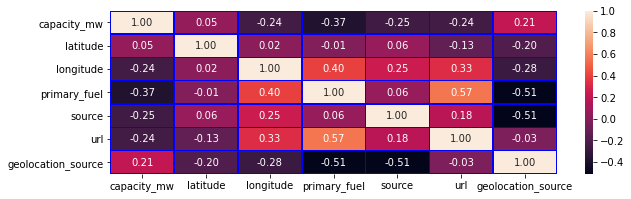

In [65]:
# Visualizing correlation
plt.figure(figsize=(10,3))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Columns longitude,primary_fuel,source,url has a good negative linear correlation with Target:capacity_mw and column geolocation_source & commissioning_year has good positive linear correlation with the target column and latitude is least correlated withh the target.geolocation_source has good correlation with latitude. primary_fuel,source,url,geolocation_source has good correlation with longitude. url,geolocation_source has good correlation with primary fuel. geolocation_source and source are strongly negatively correlated.

### Dividing dataset in x and y

In [66]:
x=dff.drop(['capacity_mw'],axis=1)
x

,latitude,longitude,primary_fuel,source,url,geolocation_source
0,28.1839,0.232163,6,109,126,1
1,24.7663,0.231183,1,174,169,2
2,21.9038,0.235083,7,21,196,2
3,23.8712,0.220960,2,22,58,2
4,21.9603,0.226052,1,22,58,2
...,...,...,...,...,...,...
903,16.2949,0.229291,1,22,58,2
904,12.8932,0.228752,6,77,22,0
905,15.2758,0.230502,7,21,246,2
906,24.3500,0.231797,1,59,82,2


In [67]:
y=dff['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 869, dtype: float64

In [68]:
print('Orginal dataset shape: ',dff.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (869, 7)
Shape of data in x :  (869, 6)
Shape of data in x :  (869,)


In [69]:
# Checking total unique values in target
df['capacity_mw'].nunique()

361

### Multicollinearity with VIF

In [70]:
# Importing libraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,latitude,13.584034
1,longitude,59.479600
2,primary_fuel,9.323427
3,source,3.815348
4,url,6.527210
5,geolocation_source,21.410701


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [72]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
#xn=x.copy()
sc=StandardScaler()
x1=sc.fit_transform(x)
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5
0,1.140959,0.906630,1.266087,1.434127,0.542088,-1.054141
1,0.586974,0.568718,-0.942323,2.875321,1.202459,0.402216
2,0.122970,1.913225,1.707769,-0.517029,1.617111,0.402216
3,0.441881,-2.955384,-0.500641,-0.494856,-0.502219,0.402216
4,0.132129,-1.200098,-0.942323,-0.494856,-0.502219,0.402216
...,...,...,...,...,...,...
864,-0.786219,-0.083609,-0.942323,-0.494856,-0.502219,0.402216
865,-1.337627,-0.269245,1.266087,0.724616,-1.055088,-2.510499
866,-0.951413,0.334038,1.707769,-0.517029,2.384984,0.402216
867,0.519493,0.780367,-0.942323,0.325516,-0.133640,0.402216


Scaling is done and difference between the low and high values has been minimized.

### Find best randon state for Train-Test Split

In [73]:
#Importing required libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

In [77]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    predtrain=dtr.predict(x_train)
    predtest=dtr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    if round(acctrain,1)==round(acctest,1) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  90  Accuracy(Training) :  99.3219881576003  Accuracy(Testing) :  59.90192577058227


Here, testing accuracy is maximum for random state=90. So, lets take 90 as our best random state.

In [78]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=90)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(695, 6)
(174, 6)
(695,)
(174,)


### Finding the best algorithm

In [79]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()

In [80]:
#Executing all algorithms in a single for loop

algo_list=[dtr,knn,rf,gd]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :
    print(i)
    i.fit(x_train,y_train)
    predtrain=i.predict(x_train)
    predtest=i.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    err1=mean_absolute_error(y_test,predtest)
    err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

DecisionTreeRegressor()
Accuracy(Training) :  99.09292939328259  Accuracy(Test)  64.08891680737877
mean_absolute_error 213.43047892720307
mean_squared_error 183809.18896257275


KNeighborsRegressor()
Accuracy(Training) :  54.408166625552504  Accuracy(Test)  40.104333326443786
mean_absolute_error 291.12243563218385
mean_squared_error 306573.15053924895


RandomForestRegressor()
Accuracy(Training) :  90.02633998378064  Accuracy(Test)  63.21504484386453
mean_absolute_error 218.71383597185704
mean_squared_error 188282.06147407874


GradientBoostingRegressor()
Accuracy(Training) :  72.1268588223141  Accuracy(Test)  57.06024313289515
mean_absolute_error 245.37441375519415
mean_squared_error 219785.12432101596




RandomForestRegressor has the highest accuracy and least error.

### Cross Validation

In [82]:
# Computing cross validation score of all the models
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x1,y,cv=80).mean()))

CV mean of  DecisionTreeRegressor()  is  0.7759426998607244
CV mean of  KNeighborsRegressor()  is  0.34119924397741896
CV mean of  RandomForestRegressor()  is  0.5953508767862865
CV mean of  GradientBoostingRegressor()  is  0.7354995200985261


Looking at difference of accuracy and cv mean, opting for RandomForestRegressor as our best model with accuracy of 63%, also having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['squared_error', 'absolute_error','poisson'],
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth': [5, 10, None],
              'n_estimators': [5, 10, 15]}

rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 5}

In [165]:
rf=RandomForestRegressor(criterion='poisson', max_features='sqrt', max_depth=10, n_estimators=5)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)
#cv=cross_val_score(rf,x1,y,cv=70).mean()
print('R2_score : ',acc)

R2_score :  0.6046620906690902


Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [166]:
# Saved the model in .pkl file
import pickle
file='global_power_regression.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [167]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.6046620906690902

We are getting 60.4% accuracy with trained model on test data.

In [170]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(174, 6)
(174,)


In [171]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':np.round(predicted,1)})
conclusion

,Orignal,Predicted
0,126.0,171.8
1,11.2,20.9
2,96.0,121.6
3,2400.0,763.8
4,16.0,140.2
...,...,...
169,331.5,175.6
170,1200.0,946.6
171,27.0,147.6
172,50.4,22.5


## Now let's take the Classification Problem with target variable as Region

### Dividing dataset in continuous and categorical

In [172]:
# Dividing the data in categorical and numeric columns
# Encoded Categorical data
df_cat_enc

,primary_fuel,source,url,geolocation_source
0,6,109,126,1
1,1,174,169,2
2,7,21,196,2
3,2,22,58,2
4,1,22,58,2
...,...,...,...,...
903,1,22,58,2
904,6,77,22,0
905,7,21,246,2
906,1,59,82,2


Categorical columns with object datatypes are already encoded having 892 rows and 4 columns.

In [173]:
# Continuous data
df_con2=df.select_dtypes(exclude='object')
df_con2

,capacity_mw,latitude,longitude
0,2.5,28.1839,73.2407
1,98.0,24.7663,74.6090
2,39.2,21.9038,69.3732
3,135.0,23.8712,91.3602
4,1800.0,21.9603,82.4091
...,...,...,...
903,1600.0,16.2949,77.3568
904,3.0,12.8932,78.1654
905,25.5,15.2758,75.5811
906,80.0,24.3500,73.7477


In [174]:
# Checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df_con2))
np.where(z>3)

(array([ 15, 142, 178, 182, 206, 241, 304, 319, 329, 336, 356, 359, 360,
        370, 410, 421, 474, 485, 486, 491, 510, 535, 627, 637, 645, 682,
        713, 765, 767, 787, 797, 858], dtype=int64),
 array([0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2,
        2, 0, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int64))

Outliers are present in the dataset.

In [175]:
# Checking the outlier in the dataset
z[15][0]

3.926464019221767

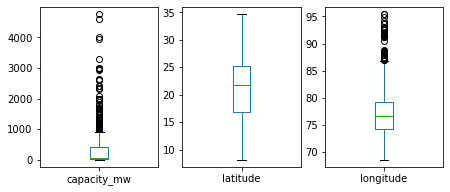

In [176]:
# Visualising outliers
df_con2.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [177]:
# Checking skewness
df_con2.skew()

capacity_mw    3.144492
latitude      -0.155233
longitude      1.123685
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

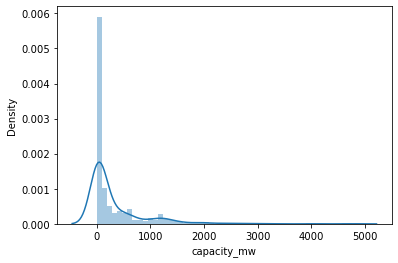

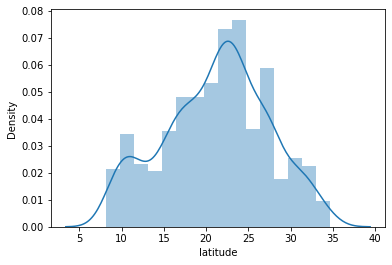

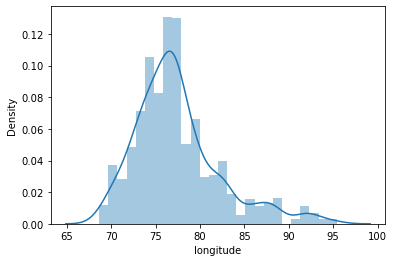

In [178]:
# Visualizing skewness
for i in df_con2.columns :
    sns.distplot(df_con2[i])
    plt.show()

Data is skewed in all the columns.

### Data Cleaning

In [179]:
# Removing outliers

df1=df_con2.copy()
df1=df_con2[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude
0,2.5,28.1839,73.2407
1,98.0,24.7663,74.6090
2,39.2,21.9038,69.3732
3,135.0,23.8712,91.3602
4,1800.0,21.9603,82.4091
...,...,...,...
903,1600.0,16.2949,77.3568
904,3.0,12.8932,78.1654
905,25.5,15.2758,75.5811
906,80.0,24.3500,73.7477


In [180]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (883, 2)
Shape of dataset after removing outliers :  (851, 3)


In [181]:
# Percentage Data lost
data_percent=(883-851)/883*100
data_percent

3.6240090600226504

Approx 4% data is lost after removing the outliers.

In [182]:
# Checking skewness after removing outliers
df1.skew()

capacity_mw    1.986329
latitude      -0.120533
longitude      0.947028
dtype: float64

We can still see skewness in capacity_mw, longitude & commissioning_year columns.

In [184]:
# Removing skewness
df2=df1.copy()
df2['longitude']=np.log(df1['longitude']+1)
print(df2.skew())

capacity_mw    1.986329
latitude      -0.120533
longitude      0.768288
dtype: float64


In [185]:
#from scipy.stats import yeojohnson,boxcox
df2['longitude']=1/(df2['longitude'])
df2.skew()

capacity_mw    1.986329
latitude      -0.120533
longitude     -0.687776
dtype: float64

Removed skewness and considering the present values as skewness threshold based on the kind of data distribution in respective columns.

In [186]:
# Checking the new dataset
df2

,capacity_mw,latitude,longitude
0,2.5,28.1839,0.232163
1,98.0,24.7663,0.231183
2,39.2,21.9038,0.235083
3,135.0,23.8712,0.220960
4,1800.0,21.9603,0.226052
...,...,...,...
903,1600.0,16.2949,0.229291
904,3.0,12.8932,0.228752
905,25.5,15.2758,0.230502
906,80.0,24.3500,0.231797


capacity_mw


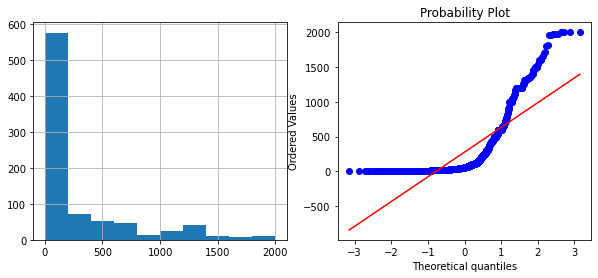

latitude


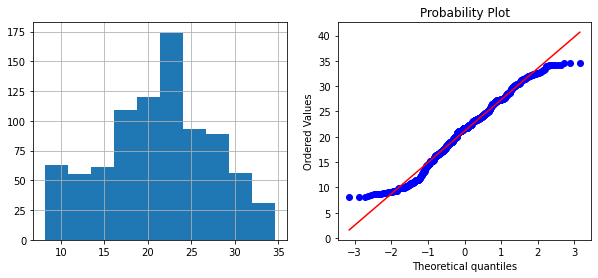

longitude


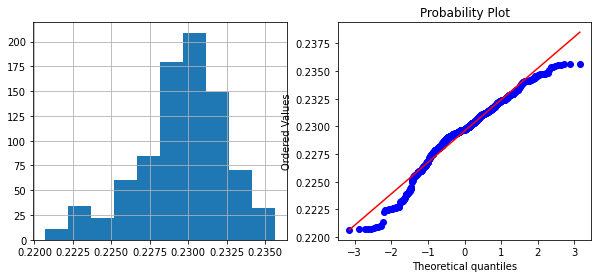

In [187]:
# Plotting Q-Q plot for showing gaussian distribution
for i in df2.columns :
    print(i)
    diagnostic_plot(df2,i)

Data is now seem to be good fit on line implies skewness is reduced.

### Combining numerical and categorical data for further analysis

In [188]:
dff=pd.concat([df2,df_cat_enc],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

Combined all the columns and removed nulls.

In [189]:
# Checking shape of new dataset
dff.shape

(851, 7)

In [190]:
# Checking the dataset
dff

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,2.5,28.1839,0.232163,6,109,126,1
1,98.0,24.7663,0.231183,1,174,169,2
2,39.2,21.9038,0.235083,7,21,196,2
3,135.0,23.8712,0.220960,2,22,58,2
4,1800.0,21.9603,0.226052,1,22,58,2
...,...,...,...,...,...,...,...
903,1600.0,16.2949,0.229291,1,22,58,2
904,3.0,12.8932,0.228752,6,77,22,0
905,25.5,15.2758,0.230502,7,21,246,2
906,80.0,24.3500,0.231797,1,59,82,2


In [191]:
# Checking correlation
dff.corr()

,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
capacity_mw,1.000000,0.047322,-0.255447,-0.394479,-0.280028,-0.265562,0.241026
latitude,0.047322,1.000000,0.024129,-0.006380,0.066578,-0.129405,-0.197382
longitude,-0.255447,0.024129,1.000000,0.396284,0.243101,0.327588,-0.276172
primary_fuel,-0.394479,-0.006380,0.396284,1.000000,0.049261,0.561920,-0.506866
source,-0.280028,0.066578,0.243101,0.049261,1.000000,0.177789,-0.503515
url,-0.265562,-0.129405,0.327588,0.561920,0.177789,1.000000,-0.026717
geolocation_source,0.241026,-0.197382,-0.276172,-0.506866,-0.503515,-0.026717,1.000000


<AxesSubplot:>

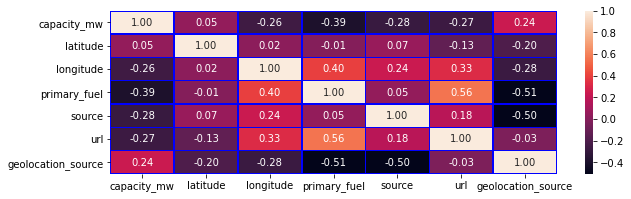

In [192]:
# Visualizing correlation
plt.figure(figsize=(10,3))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Columns longitude,primary_fuel,source,url has a good negative linear correlation with Target:capacity_mw and column geolocation_source has good positive linear correlation with the target column and latitude is least correlated with the target. primary_fuel,source,url,geolocation_source has good correlation with longitude. url,geolocation_source has good correlation with primary fuel. geolocation_source and source are strongly negatively correlated.

### Dividing dataset in x and y

In [193]:
x=dff.drop(['primary_fuel'],axis=1)
x

,capacity_mw,latitude,longitude,source,url,geolocation_source
0,2.5,28.1839,0.232163,109,126,1
1,98.0,24.7663,0.231183,174,169,2
2,39.2,21.9038,0.235083,21,196,2
3,135.0,23.8712,0.220960,22,58,2
4,1800.0,21.9603,0.226052,22,58,2
...,...,...,...,...,...,...
903,1600.0,16.2949,0.229291,22,58,2
904,3.0,12.8932,0.228752,77,22,0
905,25.5,15.2758,0.230502,21,246,2
906,80.0,24.3500,0.231797,59,82,2


In [194]:
y=dff['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 851, dtype: int32

In [195]:
print('Orginal dataset shape: ',dff.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (851, 7)
Shape of data in x :  (851, 6)
Shape of data in x :  (851,)


### Multicollinearity with VIF

In [196]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,capacity_mw,1.648435
1,latitude,13.333527
2,longitude,32.809038
3,source,2.804911
4,url,3.316521
5,geolocation_source,9.999978


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [197]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(x)
x2=pd.DataFrame(x2)
x2

,0,1,2,3,4,5
0,-0.632219,1.134258,0.898422,1.412501,0.527341,-1.036523
1,-0.411183,0.585190,0.557414,2.842399,1.182587,0.407145
2,-0.547277,0.125305,1.914242,-0.523361,1.594021,0.407145
3,-0.325546,0.441385,-2.998985,-0.501363,-0.508862,0.407145
4,3.528120,0.134382,-1.227612,-0.501363,-0.508862,0.407145
...,...,...,...,...,...,...
846,3.065217,-0.775815,-0.100891,-0.501363,-0.508862,0.407145
847,-0.631062,-1.322328,-0.288229,0.708551,-1.057440,-2.480190
848,-0.578985,-0.939542,0.320583,-0.523361,2.355935,0.407145
849,-0.452844,0.518308,0.771003,0.312579,-0.143143,0.407145


Scaling is done and difference between the low and high values has been minimized.

### Find best random state for Train-Test Split

In [198]:
#Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error

In [199]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predtest=knn.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    if round(acctrain,2)==round(acctest,2) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  55  Accuracy(Training) :  83.36134453781513  Accuracy(Testing) :  82.8125


Here, training & testing accuracies are good for random state=55. So, lets take 55 as our best random state.

In [202]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(680, 6)
(171, 6)
(680,)
(171,)


In [203]:
# Checking value counts in target column
y_train.value_counts()

3    200
1    189
6     90
7     79
2     56
0     42
5     15
4      9
Name: primary_fuel, dtype: int64

Class imbalance issue exists, hence need to resample the training data set.

### Class Imbalance

In [204]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
trainx,trainy=sm.fit_resample(x_train,y_train)

Resampling is done on training dataset as samplng on whole dataset will create unnecessary testing and validation sets which will give misleading results.

In [205]:
trainy.value_counts()

0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
Name: primary_fuel, dtype: int64

Classes are now balanced.

### Finding the best algorithm

In [206]:
# Making instance of classifiers
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [207]:
#Executing all algorithms in a single for loop

algo_list=[dtc,knn,svc,rf]
svc_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svc :
        for j in svc_kernel :
            svc=SVC(kernel=j)
            svc.fit(x_train,y_train)
            pred=svc.predict(x_test)
            acc=accuracy_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svc1=SVC(kernel=j)
        print(svc1)
        svc1.fit(x_train,y_train)
        predtrain=svc1.predict(x_train)
        predtest=svc1.predict(x_test)
        acctrain=accuracy_score(y_train,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=accuracy_score(y_train,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

DecisionTreeClassifier()
Accuracy(Training) :  100.0  Accuracy(Test)  80.11695906432749  Mean absolute error :  0.3391812865497076
[[ 7  1  0  0  0  0  0]
 [ 5 36  5  6  0  0  0]
 [ 1  2  4  2  0  0  0]
 [ 0  5  2 28  0  0  0]
 [ 1  0  4  0  1  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.82      0.69      0.75        52
           2       0.27      0.44      0.33         9
           3       0.78      0.80      0.79        35
           5       1.00      0.17      0.29         6
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        29

    accuracy                           0.80       171
   macro avg       0.77      0.71      0.68       171
weighted avg       0.84      0.80      0.80       171



KNeighborsClassifier()
Accuracy(Training) :  82.6470588235294  Accuracy(Test)  79.53216374269006  Mea

RandomForestClassifier has the highest accuracy but let's go for cross validation for models with good accuracy score.

In [208]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=90,scoring='accuracy').mean())

CV mean of  DecisionTreeClassifier()  is  0.7719753086419753
CV mean of  KNeighborsClassifier()  is  0.801111111111111
CV mean of  SVC()  is  0.7585185185185185
CV mean of  RandomForestClassifier()  is  0.8360493827160493


Looking at difference of accuracy and cv mean, opting for KNeighborsClassifier as our best model with good accuracy and least cv mean.

### Hyperparameter Tuning

In [216]:
# Using dfferent parameters for hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree','brute'],
              'metric':['minkowski'],
              'n_neighbors':[2,5,10]}

knn=KNeighborsClassifier()
GCV=GridSearchCV(knn,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'distance'}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [221]:
knn=KNeighborsClassifier(algorithm='auto',metric='minkowski',weights='distance',n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(knn,x2,y,cv=100).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8304093567251462  CV mean :  0.8002777777777778


#### We are getting model accuracy as 83% and cv mean as approx 0.80 for the parameter set defined, this shows our model is performing good.

### AUC-ROC Curve

Multiclass format is not supported by AUC-ROC curve.

### Saving the model

In [226]:
# Saved the model in .pkl file
import pickle
file='global_power_classification.pkl'
pickle.dump(knn,open(file,'wb'))

### Conclusion

In [227]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8304093567251462

In [228]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(171, 6)
(171,)


In [229]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[:30]

,Orignal,Predicted
0,7,7
1,1,1
2,6,6
3,7,7
4,1,0
5,1,1
6,1,1
7,3,3
8,6,6
9,3,3
